In [ ]:
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import numpy as np
# import pandas as pd
# import os
# import kagglehub
# import cv2
# import tensorflow as tf
# import tensorflow_hub as hub
# # from tensorflow.keras import Model
# # from tensorflow.keras.applications.resnet50 import ResNet50
# # from tensorflow.keras.preprocessing import image
# # from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
# # from tensorflow.keras.layers import GlobalMaxPooling2D
# # from sklearn.metrics.pairwise import pairwise_distances
# # from sklearn.metrics.pairwise import pairwise_distances
# import torch
# import torchvision
# import torchvision.transforms as T
# from PIL import Image
# import torch.optim as optim

In [ ]:
# !pip install segmentation_models_pytorch
import segmentation_models_pytorch as smp

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.3/121.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip install swifter

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import kagglehub
import cv2
import tensorflow_hub as hub
from tensorflow.keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalMaxPooling2D
import swifter
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold import TSNE
import time
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import torch.optim as optim

# **Data Loading**

In [ ]:
# load the data
dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")
print("Path to dataset files:", dataset_path)

df = pd.read_csv(r"/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/styles.csv", nrows=5000)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1


id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

   year   usage                             productDisplayName      image  
0  2011  Casual               Turtle Check Men Navy Blue Shirt  15970.jpg  
1  2012  Casual             Peter England Men Party Blue Jeans  39386.jpg  
2  2016  Casual                       Titan Women Silver Watch  59263.jpg  
3  2011  Casual  Manchester United Men Solid Black Track Pants  21379.jpg  
4  2012  Casual                          Puma Men Grey T-shirt  53759.jpg

In [ ]:
image_dir = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-small/versions/1/images"

def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout()

def img_path(img_name):
    return os.path.join(image_dir, img_name)

def load_image(image_name, scale_factor=2):
    image_path = os.path.join(image_dir, image_name)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load {image_path}")
        return None
    img = cv2.resize(img, (img.shape[1]*scale_factor, img.shape[0]*scale_factor), interpolation = cv2.INTER_CUBIC)
    return img

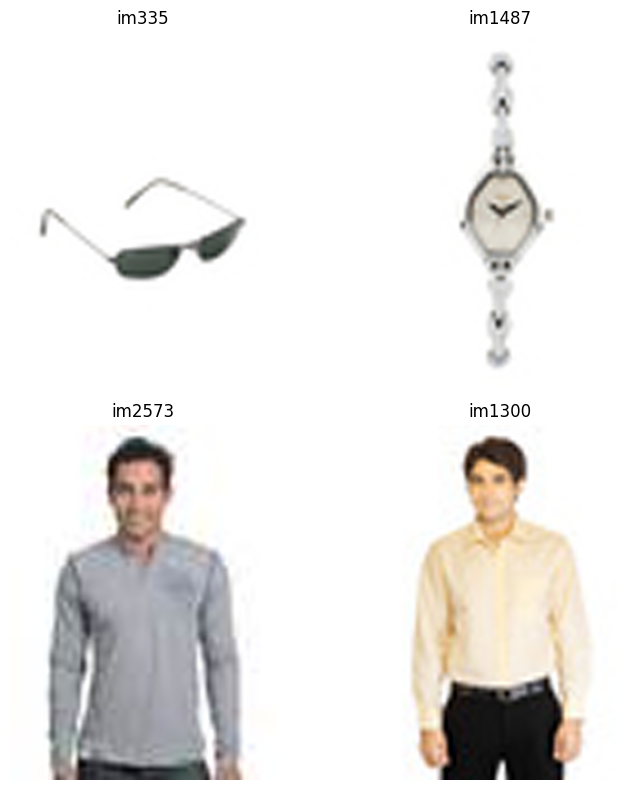

In [ ]:
# generation of a dictionary of title and image pairs
figures = {}
for i, row in df.sample(4).iterrows():
    img = load_image(row.image, scale_factor=4)
    if img is not None:
        figures['im' + str(i)] = img
    else:
        print(f"Skipping {row.image}, as it could not be loaded.")

if figures:
    plot_figures(figures, 2, 2)
else:
    print("No valid images to display.")

# **CNN-based feature extraction + Deep Learning-based Style Transfer**

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the TensorFlow Hub Style Transfer model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Load the style image (replace with your own)
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"
if os.path.exists(style_image_path):
    print("✅ File exists:", style_image_path)
else:
    print("❌ File NOT found! Check the path.")
style_image = load_image(style_image_path)
styled_images = {}

✅ File exists: /content/drive/My Drive/Colab Notebooks/style_image.jpg


In [ ]:
feature_extractor = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))

# Function to Extract Features Using CNN
def extract_features(image_tensor):
    image_tensor = tf.convert_to_tensor(image_tensor, dtype=tf.float32)
    image_tensor = tf.squeeze(image_tensor, axis=0) if len(image_tensor.shape) == 5 else image_tensor  # Remove extra dim
    # image_tensor = tf.expand_dims(image_tensor, axis=0)
    feature_maps = feature_extractor(image_tensor)  # Extract features
    return feature_maps

<ipython-input-21-dafaf627a9d5>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  feature_extractor = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(256, 256, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
img = cv2.imread(style_image_path)
if img is None:
    print("❌ Image could not be loaded. Check the path or file format.")
else:
    print("✅ Image loaded successfully:", img.shape)

✅ Image loaded successfully: (195, 258, 3)


In [ ]:
# load and preprocess an image

def load_image1(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR) # ensure 3 channels (BGR)
    if img is None:
        print(f"❌ Error: Unable to load image {image_path}. Check the path.")
        return None  # Return None to avoid crashing
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img.astype(np.float32) / 255.0  # Normalize

    return img

# Your T-shirt images (Replace with actual file paths)
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg",
]

# load images
if style_image is not None:
  style_tensor = tf.convert_to_tensor(style_image, dtype=tf.float32)
  style_tensor = tf.expand_dims(style_tensor, axis=0)
  style_tensor = tf.image.resize(style_tensor, (256, 256))
  # Extract Features Correctly
  style_features = extract_features(style_tensor)

In [ ]:
# # store the styled images
# styled_images = {}

# apply style transfer to each T-shirt image
for img_path in tshirt_images:
    content_image = load_image1(img_path)

    if content_image is None:
        continue  # Skip if image couldn't be loaded

    # Convert to tensor
    content_tensor = tf.convert_to_tensor(content_image, dtype=tf.float32)
    content_tensor = tf.expand_dims(content_tensor, axis=0)  # Add batch dimension

    # Ensure correct shape for style transfer (not feature maps)
    content_tensor_resized = tf.image.resize(content_tensor, (256, 256))
    style_tensor_resized = tf.image.resize(style_tensor, (256, 256))

    # Apply style transfer using hub_model
    stylized_image = hub_model(content_tensor_resized, style_tensor_resized)[0]

    # Convert result to NumPy array
    styled_images[img_path] = np.array(stylized_image * 255).astype(np.uint8)


In [ ]:
def plot_figures(figures, nrows=1, ncols=1, figsize=(8, 8)):
    """
    Plot a dictionary of figures.
    """
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        if img.shape[0] == 1:  # If shape is (1, 256, 256, 3), remove batch dimension
            img = np.squeeze(img, axis=0)  # Converts (1, 256, 256, 3) → (256, 256, 3)

        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()
    plt.show()


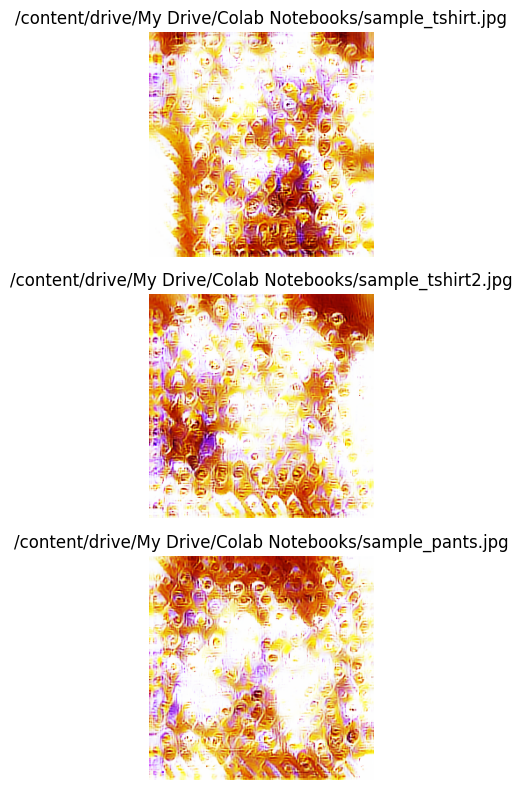

In [ ]:
if styled_images:
    plot_figures(styled_images, 3, 1)
else:
    print("No valid images to display.")

Style Image Found: /content/drive/My Drive/Colab Notebooks/style_image.jpg


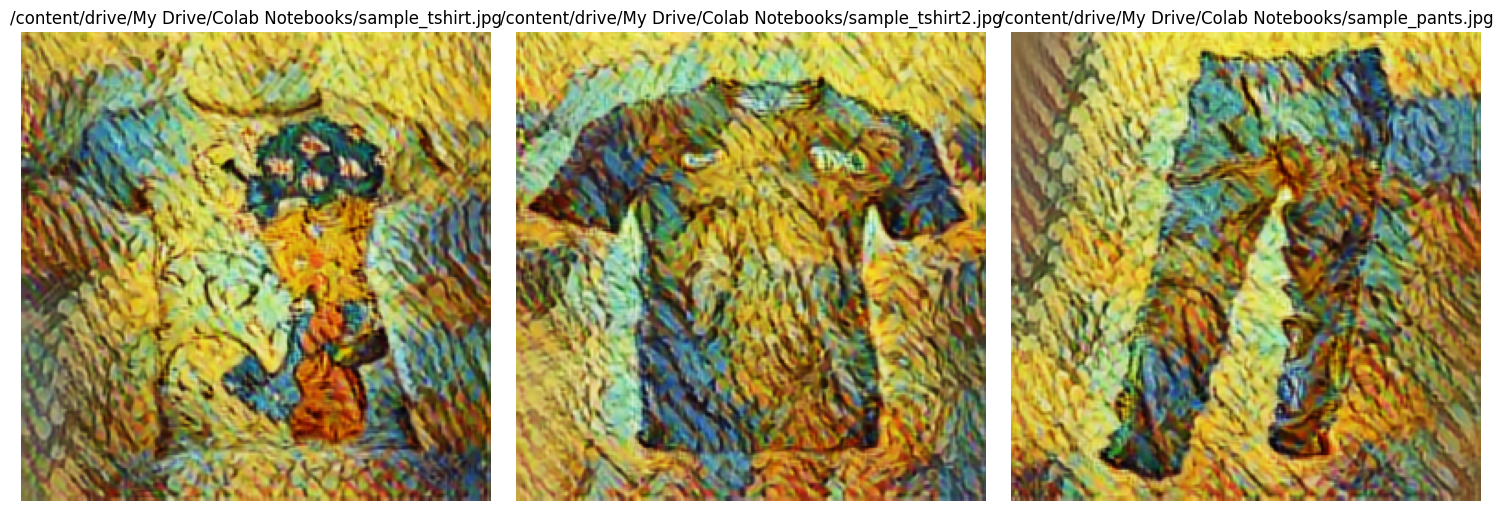

In [ ]:
# Load the Style Transfer Model
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Load and Preprocess an Image
def load_image(image_path):
    """Load an image and preprocess for style transfer."""
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Ensure 3 channels (BGR)

    if img is None:
        print(f"Error: Unable to load image {image_path}. Check the path.")
        return None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (256, 256))  # Resize to 256x256
    img = img.astype(np.float32) / 255.0  # Normalize to [0,1]

    return img

# Load the Style Image
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"

if os.path.exists(style_image_path):
    print("Style Image Found:", style_image_path)
    style_image = load_image(style_image_path)
else:
    print("Style Image Not Found!")
    style_image = None

# Convert style image to Tensor
if style_image is not None:
    style_tensor = tf.convert_to_tensor(style_image, dtype=tf.float32)
    style_tensor = tf.expand_dims(style_tensor, axis=0)  # Add batch dimension

# Define Content Images (T-Shirts)
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Style Transfer
styled_images = {}

for img_path in tshirt_images:
    content_image = load_image(img_path)

    if content_image is None:
        continue  # Skip if image couldn't be loaded

    # Convert to Tensor
    content_tensor = tf.convert_to_tensor(content_image, dtype=tf.float32)
    content_tensor = tf.expand_dims(content_tensor, axis=0)  # Add batch dimension

    # Apply Style Transfer Model
    stylized_image = hub_model(content_tensor, style_tensor)[0]  # No need to resize

    # Convert to NumPy Array for Visualization
    styled_images[img_path] = np.array(stylized_image * 255).astype(np.uint8)

# Plot the Results
def plot_figures(figures, nrows=1, ncols=1, figsize=(8, 8)):
    """
    Plot a dictionary of images.
    """
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        img = np.squeeze(img, axis=0)  # Remove batch dimension (1,256,256,3) → (256,256,3)

        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()
    plt.show()

# Display the Styled Images
if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")


Style Image Found: /content/drive/My Drive/Colab Notebooks/style_image2.jpg


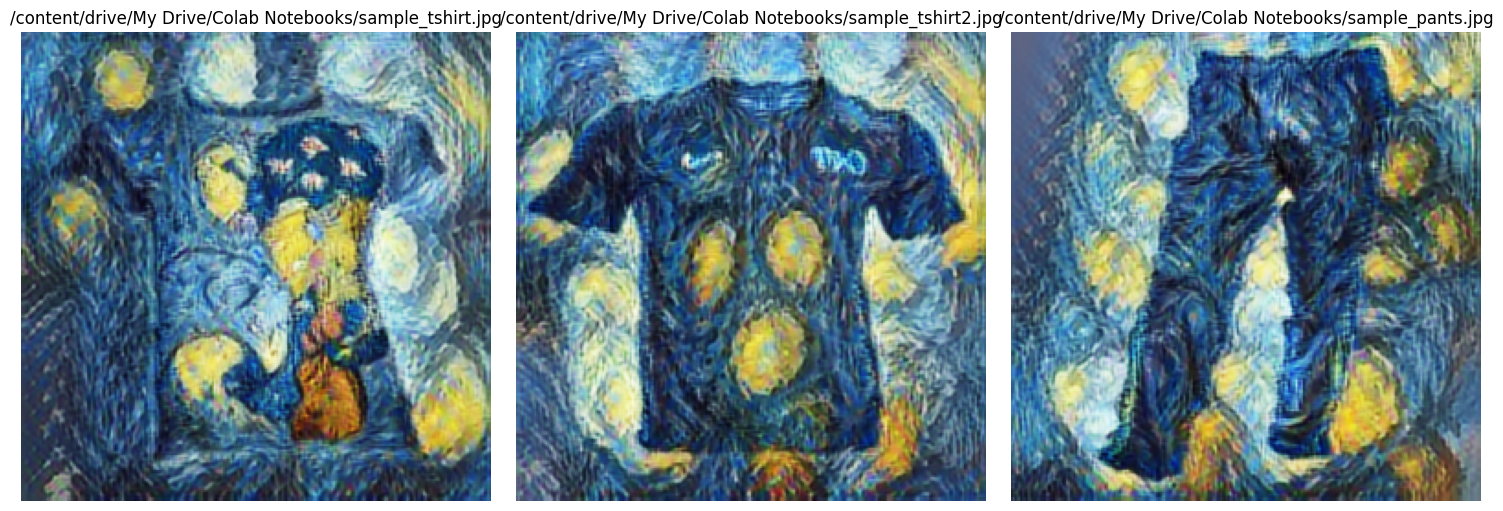

In [ ]:
# style image 2
# Load the Style Image
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image2.jpg"

if os.path.exists(style_image_path):
    print("Style Image Found:", style_image_path)
    style_image = load_image(style_image_path)
else:
    print("Style Image Not Found!")
    style_image = None

# Convert style image to Tensor
if style_image is not None:
    style_tensor = tf.convert_to_tensor(style_image, dtype=tf.float32)
    style_tensor = tf.expand_dims(style_tensor, axis=0)  # Add batch dimension

# Define Content Images (T-Shirts)
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Style Transfer
styled_images = {}

for img_path in tshirt_images:
    content_image = load_image(img_path)

    if content_image is None:
        continue  # Skip if image couldn't be loaded

    # Convert to Tensor
    content_tensor = tf.convert_to_tensor(content_image, dtype=tf.float32)
    content_tensor = tf.expand_dims(content_tensor, axis=0)  # Add batch dimension

    # Apply Style Transfer Model
    stylized_image = hub_model(content_tensor, style_tensor)[0]  # No need to resize

    # Convert to NumPy Array for Visualization
    styled_images[img_path] = np.array(stylized_image * 255).astype(np.uint8)

# Display the Styled Images
if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")

## **model performance measurement**

# **Hybrid Stylization Model with DeepLabV3?-based segmentation**

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 0
Content Tensor Shape (Before NST): (1, 512, 512, 3)
Style Tensor Shape (Before NST): (1, 512, 512, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 0
Content Tensor Shape (Before NST): (1, 512, 512, 3)
Style Tensor Shape (Before NST): (1, 512, 512, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 0
Content Tensor Shape (Before NST): (1, 512, 512, 3)
Style Tensor Shape (Before NST): (1, 512, 512, 3)


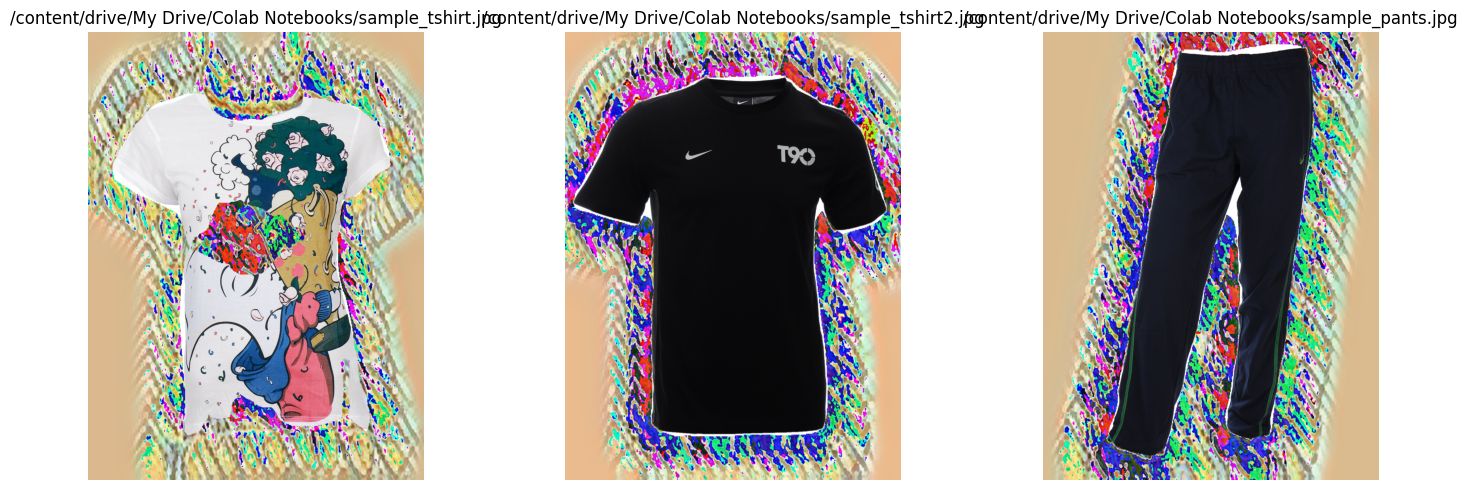

In [ ]:
# Load DeepLabV2 Model (Using DeepLabV3+ for Better Results)
# deeplab_model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained=True)
deeplab_model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_mobilenet_v3_large", pretrained=True)
deeplab_model.eval()  # Set to evaluation mode

# Load the Neural Style Transfer Model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Define Image Transformation for DeepLab Segmentation
transform = T.Compose([
    T.Resize((512, 512)),  # Ensure DeepLab gets at least 256x256 input
    T.ToTensor()
])

# Load & Preprocess Image for Segmentation
def load_image2(image_path):
    """Loads an image and preprocesses it for DeepLab segmentation."""
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Convert to Tensor
    return image, input_tensor

# Extract T-Shirt Mask from Segmentation Output
def extract_tshirt_mask(output):
    """Extracts the T-shirt region from the segmentation mask."""
    mask = output.argmax(1).squeeze().cpu().numpy()  # Get highest probability class
    unique_classes = np.unique(mask)
    print(f"Unique classes detected in the mask: {unique_classes}")

    # Auto-detect the most likely T-shirt class
    tshirt_class = max(unique_classes, key=lambda cls: np.sum(mask == cls))
    print(f"Detected T-shirt class: {tshirt_class}")

    # Convert to binary mask
    mask = (mask == tshirt_class).astype(np.uint8) * 511
    return mask

# Apply Neural Style Transfer (NST) Only to the T-shirt Area
def apply_nst_to_tshirt(content_img, style_img_path):
    """Applies Neural Style Transfer only to the extracted T-shirt region."""
    # Load and preprocess style image
    style_image = Image.open(style_img_path).convert("RGB").resize((512, 512))
    style_tensor = tf.convert_to_tensor(np.array(style_image), dtype=tf.float32) / 511.0
    style_tensor = tf.expand_dims(style_tensor, axis=0)

    # Convert content image to TensorFlow format & Resize
    content_img = cv2.resize(content_img, (512, 512))
    content_tensor = tf.convert_to_tensor(content_img, dtype=tf.float32) / 511.0
    content_tensor = tf.expand_dims(content_tensor, axis=0)

    # Debugging prints
    print("Content Tensor Shape (Before NST):", content_tensor.shape)
    print("Style Tensor Shape (Before NST):", style_tensor.shape)

    # Apply NST
    stylized_image = hub_model(content_tensor, style_tensor)[0].numpy()

    # Convert back to NumPy format (0-511)
    stylized_image = (stylized_image * 511).astype(np.uint8)
    return stylized_image

# Blend the Stylized T-shirt into the Original Image
def blend_tshirt(original, stylized, mask):
    """Blends the stylized T-shirt back into the original image using the segmentation mask."""
    if stylized is None or stylized.size == 0:
        print("Error: Stylized T-shirt image is empty. Skipping blending.")
        return original

    stylized = np.squeeze(stylized, axis=0)  # Remove batch dimension

    # Resize mask and stylized image to match original size
    mask_resized = cv2.resize(mask, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
    stylized_resized = cv2.resize(stylized, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Convert mask to 3-channel
    mask_3d = np.stack([mask_resized] * 3, axis=-1)

    # Blend the images using the mask
    blended = np.where(mask_3d == 511, stylized_resized, original)

    return blended

# Define Content (T-shirt) Images
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Hybrid Stylization Model (DeepLabV2 + NST) to All Images
styled_images = {}
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"

for img_path in tshirt_images:
    if not os.path.exists(img_path):
        print(f"Skipping {img_path}: File not found.")
        continue

    print(f"Processing {img_path}...")

    # Get original image and input tensor
    original_image, input_tensor = load_image2(img_path)

    # Run segmentation model
    with torch.no_grad():
        output = deeplab_model(input_tensor)['out']
    tshirt_mask = extract_tshirt_mask(output)

    # Apply NST only to the T-shirt region
    styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path)

    if styled_tshirt is None:
        print(f"Skipping {img_path}: NST failed.")
        continue

    # Blend stylized T-shirt back into the original image
    final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

    # Store the final stylized image
    styled_images[img_path] = final_image

# Plot Results
def plot_figures(figures, nrows=1, ncols=3, figsize=(15, 5)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()
    plt.show()

if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg...
Unique classes detected in the mask: [0]
Detected T-shirt class: 0
Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 15
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 15


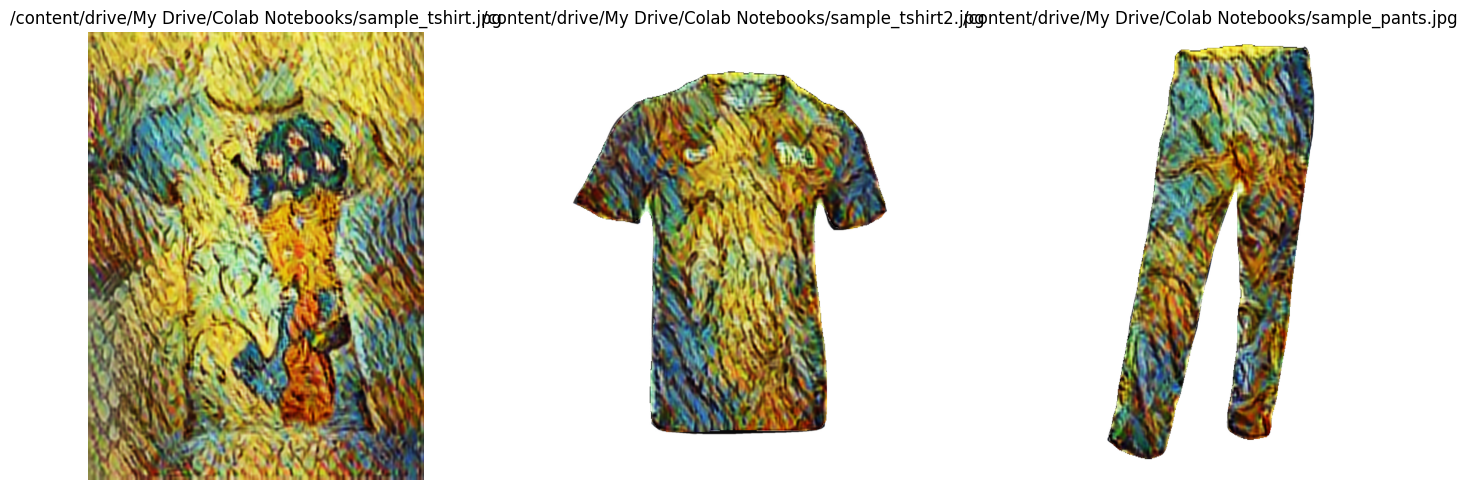

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import torch
import torchvision.transforms as T
import segmentation_models_pytorch as smp
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Load DeepLabV3+ Model
deeplab_model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained=True)
deeplab_model.eval()

# Load the Neural Style Transfer Model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Define Image Transformation for DeepLab Segmentation
transform = T.Compose([
    T.Resize((512, 512)),  # Higher resolution for better segmentation
    T.ToTensor()
])

# Load & Preprocess Image for Segmentation
def load_image2(image_path):
    """Loads an image and preprocesses it for DeepLab segmentation."""
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)  # Convert to Tensor
    return image, input_tensor

# Extract Clothes (T-Shirt) Mask
def apply_nst_to_tshirt(content_img, style_img_path, mask):
    """Applies Neural Style Transfer only to the extracted T-shirt region."""

    # Load and preprocess style image
    style_image = Image.open(style_img_path).convert("RGB").resize((256, 256))
    style_tensor = tf.convert_to_tensor(np.array(style_image), dtype=tf.float32) / 255.0
    style_tensor = tf.expand_dims(style_tensor, axis=0)

    # Resize content image & mask
    content_img = cv2.resize(content_img, (256, 256))
    mask_resized = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST)

    # Convert content image to Tensor
    content_tensor = tf.convert_to_tensor(content_img, dtype=tf.float32) / 255.0
    content_tensor = tf.expand_dims(content_tensor, axis=0)

    # ✅ Apply NST
    stylized_image = hub_model(content_tensor, style_tensor)[0].numpy()

    # ✅ Remove batch dimension (Fixing the shape issue)
    stylized_image = np.squeeze(stylized_image, axis=0)  # Shape: (256, 256, 3)

    # ✅ Ensure mask is 3D for correct broadcasting
    mask_3d = np.stack([mask_resized] * 3, axis=-1)  # Shape: (256, 256, 3)

    # ✅ Blend style using mask (Apply style only inside T-shirt area)
    stylized_image[mask_3d == 0] = content_img[mask_3d == 0]  # Keep background unchanged

    return (stylized_image * 255).astype(np.uint8)


# Blend Stylized T-shirt into the Original Image
def blend_tshirt(original, stylized, mask):
    """Blends the stylized T-shirt back into the original image using the segmentation mask."""

    # Resize mask and stylized image to match original size
    mask_resized = cv2.resize(mask, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
    stylized_resized = cv2.resize(stylized, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)

    # Convert mask to 3-channel
    mask_3d = np.stack([mask_resized] * 3, axis=-1)

    # Blend only T-shirt area, keep background unchanged
    blended = np.where(mask_3d == 255, stylized_resized, original)

    return blended

# Define Content (T-shirt) Images
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Hybrid Stylization Model (DeepLabV2 + NST) to All Images
styled_images = {}
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"

for img_path in tshirt_images:
    if not os.path.exists(img_path):
        print(f"Skipping {img_path}: File not found.")
        continue

    print(f"Processing {img_path}...")

    # Get original image and input tensor
    original_image, input_tensor = load_image2(img_path)

    # Run segmentation model
    with torch.no_grad():
        output = deeplab_model(input_tensor)['out']
    tshirt_mask = extract_tshirt_mask(output)

    # Apply NST only to the T-shirt region
    styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path, tshirt_mask)

    if styled_tshirt is None:
        print(f"Skipping {img_path}: NST failed.")
        continue

    # Blend stylized T-shirt back into the original image
    final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

    # Store the final stylized image
    styled_images[img_path] = final_image

# Plot Results
def plot_figures(figures, nrows=1, ncols=3, figsize=(15, 5)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()

if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")

# **IoU of Unet**

In [ ]:
# Re-load necessary libraries and models after execution state reset
from sklearn.metrics import jaccard_score
# import segmentation_models_pytorch as smp

# Re-load the UNet model with MobileNetV2 Encoder
unet_model = smp.Unet(
    encoder_name="mobilenet_v2",
    encoder_weights="imagenet",
    in_channels=3,
    classes=1
)
unet_model.eval()  # Set to evaluation mode

# Reload ground truth masks (previously generated)
mask_paths = [
    "/content/drive/My Drive/Colab Notebooks/mask_tshirt2.png",
    "/content/drive/My Drive/Colab Notebooks/mask_pants.png"
]
ground_truth_masks = [cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE) for mask_path in mask_paths]

# Ensure binary masks (0 or 1)
ground_truth_masks = [(mask > 128).astype(np.uint8) for mask in ground_truth_masks]

# Reload and preprocess images for UNet model
image_paths = ["/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
               "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"]


def preprocess_image_for_unet(image_path):
    """Preprocess image for UNet segmentation."""
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = np.transpose(img, (2, 0, 1))  # Convert to (C, H, W)
    img = img / 255.0  # Normalize
    return torch.tensor(img, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

# Generate predicted masks using UNet
predicted_masks = []
for img_path in image_paths:
    input_tensor = preprocess_image_for_unet(img_path)
    with torch.no_grad():
        pred_mask = unet_model(input_tensor)
    pred_mask = torch.sigmoid(pred_mask).squeeze().cpu().numpy()
    pred_mask = (pred_mask > 0.5).astype(np.uint8)  # Convert to binary mask
    predicted_masks.append(pred_mask)

ground_truth_masks_resized = [cv2.resize(mask, (256, 256), interpolation=cv2.INTER_NEAREST) for mask in ground_truth_masks]

# Compute IoU for each garment
iou_scores = [jaccard_score(gt.flatten(), pred.flatten(), average="binary")
              for gt, pred in zip(ground_truth_masks_resized, predicted_masks)]

# Display results
iou_results = {"T-shirt IoU": iou_scores[0], "Pants IoU": iou_scores[1]}
iou_results


{'T-shirt IoU': 0.011382513997415862, 'Pants IoU': 0.0412262156448203}

# **SSIM of Unet**

In [ ]:
# import torchvision.transforms as T
# from skimage.metrics import structural_similarity as ssim


# unet_model = smp.Unet(
#     encoder_name="mobilenet_v2",
#     encoder_weights="imagenet",  # ImageNet pre-trained weights
#     in_channels=3,  # RGB input
#     classes=1,  # Binary segmentation (T-shirt vs. background)
# )
# unet_model.eval()

# hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# # Preprocess Image for UNet
# def preprocess_image(image_path, size=(256, 256)):
#     """Load image and preprocess it for UNet segmentation."""
#     image = Image.open(image_path).convert("RGB")
#     transform = T.Compose([
#         T.Resize(size),  # Resize to match UNet input
#         T.ToTensor(),  # Convert to tensor
#     ])
#     return image, transform(image).unsqueeze(0)

# # Generate T-shirt Mask Using UNet
# def get_tshirt_mask(image_path):
#     image, input_tensor = preprocess_image(image_path)
#     with torch.no_grad():
#         mask = unet_model(input_tensor)  # Run UNet
#     mask = torch.sigmoid(mask).squeeze().cpu().numpy()
#     mask = (mask > 0.5).astype(np.uint8) * 255  # Convert to binary mask
#     return image, mask

# # Apply Neural Style Transfer (NST) Only to the T-shirt Area
# def apply_nst_to_tshirt(content_img, style_img_path):
#     # Load and preprocess the style image
#     style_image = Image.open(style_img_path).convert("RGB").resize((256, 256))
#     style_tensor = tf.convert_to_tensor(np.array(style_image), dtype=tf.float32) / 255.0
#     style_tensor = tf.expand_dims(style_tensor, axis=0)

#     # Convert content image to TensorFlow format & Resize
#     content_img = cv2.resize(content_img, (256, 256))
#     content_tensor = tf.convert_to_tensor(content_img, dtype=tf.float32) / 255.0
#     content_tensor = tf.expand_dims(content_tensor, axis=0)

#     try:
#         # Apply NST
#         stylized_image = hub_model(content_tensor, style_tensor)[0].numpy()

#         # ✅ Check if NST failed
#         if stylized_image is None or stylized_image.size == 0:
#             print("NST failed: No valid output generated.")
#             return None

#         # Convert back to NumPy array (0-255)
#         stylized_image = (stylized_image * 255).astype(np.uint8)
#         return stylized_image

#     except Exception as e:
#         print(f"Error applying NST: {e}")
#         return None  # Return None if NST fails


# # Blend the Stylized T-shirt into the Original Image
# def blend_tshirt(original, stylized, mask):
#     if stylized is None or stylized.size == 0:
#         print("Error: Stylized T-shirt image is empty. Skipping blending.")
#         return original  # Return the original image if blending fails

#     # Resize mask and stylized image to match the original image size
#     mask_resized = cv2.resize(mask, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
#     stylized_resized = cv2.resize(stylized, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)

#     # Convert mask to 3-channel
#     mask_3d = np.stack([mask_resized] * 3, axis=-1)

#     blended = np.where(mask_3d == 255, stylized_resized, original)
#     return blended


# tshirt_images = [
#     "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
#     "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
# ]

# # Apply Hybrid Stylization Model (UNet + NST)
# styled_images = {}
# style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"

# for img_path in tshirt_images:
#     if not os.path.exists(img_path):
#         continue

#     # Get original image and T-shirt mask
#     original_image, tshirt_mask = get_tshirt_mask(img_path)

#     # Apply NST to the T-shirt region
#     styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path)

#     if styled_tshirt is None:
#         continue

#     # Blend stylized T-shirt back into the original image
#     final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

#     # Store the final stylized image
#     styled_images[img_path] = final_image

# # Compute SSIM Scores
# def compute_ssim(original_image_path, stylized_image):
#     """Computes Structural Similarity Index (SSIM) between original and stylized images."""
#     original_image = Image.open(original_image_path).convert("RGB")
#     original_gray = np.array(original_image.convert("L"))
#     stylized_gray = cv2.cvtColor(stylized_image, cv2.COLOR_RGB2GRAY)

#     original_gray = cv2.resize(original_gray, (stylized_gray.shape[1], stylized_gray.shape[0]))

#     # Compute SSIM
#     ssim_score = ssim(original_gray, stylized_gray, data_range=255)

#     return ssim_score


# ssim_results = {}
# for img_path in tshirt_images:
#     if img_path in styled_images:
#         ssim_results[img_path] = compute_ssim(img_path, styled_images[img_path])

# df_ssim_results = pd.DataFrame.from_dict(ssim_results, orient="index", columns=["SSIM Score"])
# df_ssim_results

Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg...
Unique classes detected in the mask: [0]
Detected T-shirt class: 0
Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 15
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...
Unique classes detected in the mask: [ 0 15]
Detected T-shirt class: 15


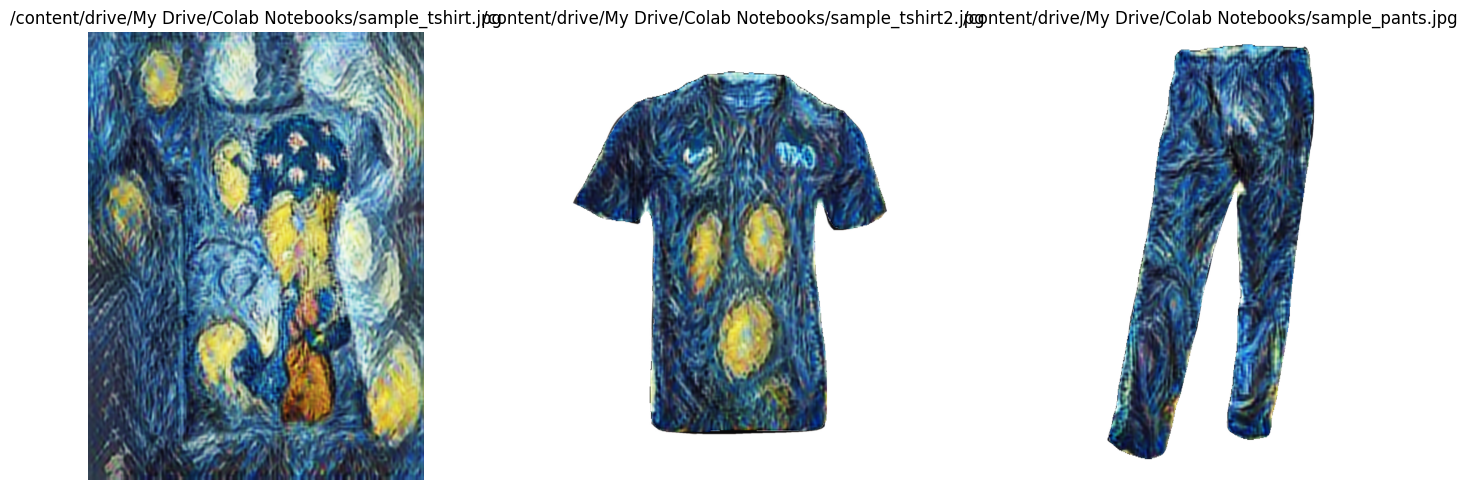

In [ ]:
# Define Content (T-shirt) Images
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Hybrid Stylization Model (DeepLabV2 + NST) to All Images
styled_images = {}
style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image2.jpg"

for img_path in tshirt_images:
    if not os.path.exists(img_path):
        print(f"Skipping {img_path}: File not found.")
        continue

    print(f"Processing {img_path}...")

    # Get original image and input tensor
    original_image, input_tensor = load_image2(img_path)

    # Run segmentation model
    with torch.no_grad():
        output = deeplab_model(input_tensor)['out']
    tshirt_mask = extract_tshirt_mask(output)

    # Apply NST only to the T-shirt region
    styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path, tshirt_mask)

    if styled_tshirt is None:
        print(f"Skipping {img_path}: NST failed.")
        continue

    # Blend stylized T-shirt back into the original image
    final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

    # Store the final stylized image
    styled_images[img_path] = final_image

# Plot Results
def plot_figures(figures, nrows=1, ncols=3, figsize=(15, 5)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()

if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")

# **Hybrid Stylization Mode with UNet-based segmentation**

Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)


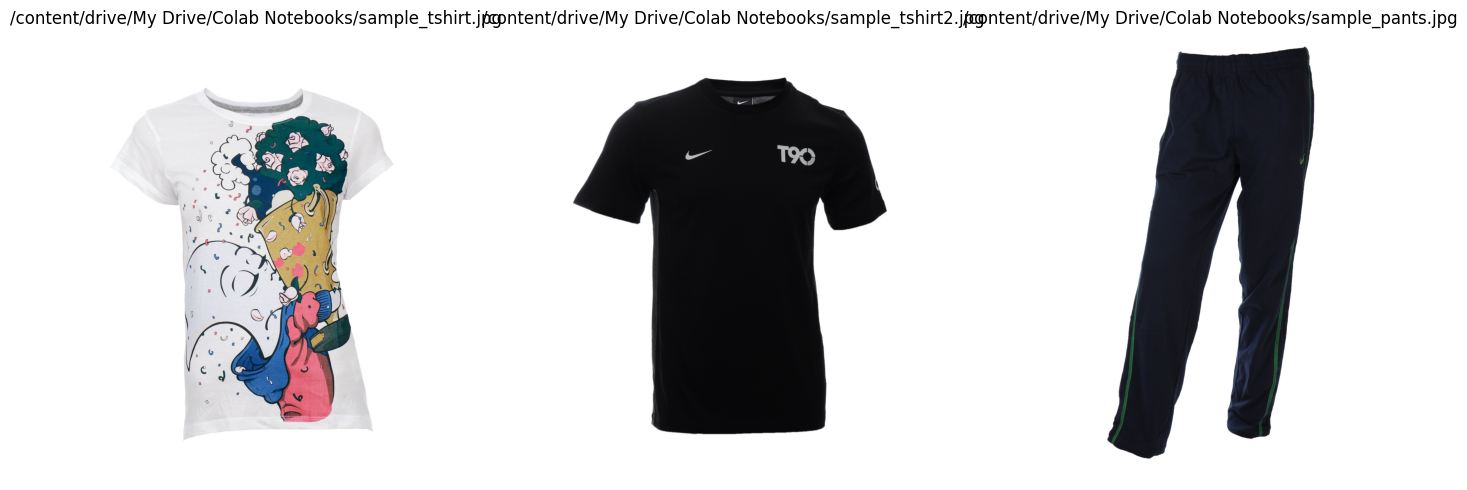

In [ ]:
# Load the UNet Model with MobileNetV2 Encoder
unet_model = smp.Unet(
    encoder_name="mobilenet_v2",
    encoder_weights="imagenet",  # ImageNet pre-trained weights
    in_channels=3,  # RGB input
    classes=1,  # Binary segmentation (T-shirt vs. background)
    # encoder_depth=5,
)
unet_model.eval()  # Set to evaluation mode

# Load the Style Transfer Model
hub_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# Preprocess Image for UNet
def preprocess_image(image_path, size=(256, 256)):
    """Load image and preprocess it for UNet segmentation."""
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([
        T.Resize(size),  # Resize to match UNet input
        T.ToTensor(),  # Convert to tensor
    ])
    return image, transform(image).unsqueeze(0)

# Generate T-shirt Mask Using UNet
def get_tshirt_mask(image_path):
    image, input_tensor = preprocess_image(image_path)
    with torch.no_grad():
        mask = unet_model(input_tensor)  # Run UNet
    mask = torch.sigmoid(mask).squeeze().cpu().numpy()
    mask = (mask > 0.5).astype(np.uint8) * 255  # Convert to binary mask
    return image, mask

# Apply Neural Style Transfer (NST) Only to the T-shirt Area
def apply_nst_to_tshirt(content_img, style_img_path):
    """
    Applies Neural Style Transfer (NST) only to the extracted T-shirt region.
    """

    # Load and preprocess the style image
    style_image = Image.open(style_img_path).convert("RGB").resize((256, 256))
    style_tensor = tf.convert_to_tensor(np.array(style_image), dtype=tf.float32) / 255.0
    style_tensor = tf.expand_dims(style_tensor, axis=0)

    # Convert content image to TensorFlow format & Resize
    content_img = cv2.resize(content_img, (256, 256))
    content_tensor = tf.convert_to_tensor(content_img, dtype=tf.float32) / 255.0
    content_tensor = tf.expand_dims(content_tensor, axis=0)

    # Debug input shapes
    print("Content Tensor Shape (Before NST):", content_tensor.shape)
    print("Style Tensor Shape (Before NST):", style_tensor.shape)

    try:
        # Apply NST
        stylized_image = hub_model(content_tensor, style_tensor)[0].numpy()
        if stylized_image is None or stylized_image.size == 0:
            print("NST failed: No output generated.")
            return None
        # Convert back to NumPy array (0-255)
        stylized_image = (stylized_image * 255).astype(np.uint8)
        return stylized_image
    except Exception as e:
        print(f"Error applying NST: {e}")
        return None  # Return None if NST fails



# Blend the Stylized T-shirt into the Original Image
def blend_tshirt(original, stylized, mask):
    """
    Blends the stylized T-shirt back into the original image using the segmentation mask.
    """
    if stylized is None or stylized.size == 0:
        print("Error: Stylized T-shirt image is empty. Check NST output.")
        return original  # Return the original image if blending fails
    print("Stylized Image Shape Before Resizing:", stylized.shape)

    # Resize mask and stylized image to match the original image size
    mask_resized = cv2.resize(mask, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_NEAREST)
    stylized_resized = cv2.resize(stylized, (original.shape[1], original.shape[0]), interpolation=cv2.INTER_CUBIC)
    # Convert mask to 3-channel
    mask_3d = np.stack([mask_resized] * 3, axis=-1)
    # Blend only the T-shirt area with the stylized image
    blended = np.where(mask_3d == 511, stylized_resized, original)
    return blended


# Define Content (T-shirt) Images
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Hybrid Stylization Model (UNet + NST)
styled_images = {}

style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image.jpg"

for img_path in tshirt_images:
    if not os.path.exists(img_path):
        print(f"Skipping {img_path}: File not found.")
        continue

    print(f"Processing {img_path}...")

    # Get original image and T-shirt mask
    original_image, tshirt_mask = get_tshirt_mask(img_path)

    # Apply NST to the T-shirt region
    styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path)

    if styled_tshirt is None:
        print(f"Skipping {img_path}: NST failed.")
        continue

    # Ensure correct shape before blending
    print("Styled T-shirt Shape Before Blending:", styled_tshirt.shape)
    styled_tshirt = np.squeeze(styled_tshirt, axis=0)  # Remove batch dim

    # Blend stylized T-shirt back into the original image
    final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

    # Store the final stylized image
    styled_images[img_path] = final_image




# Plot Results
def plot_figures(figures, nrows=1, ncols=3, figsize=(15, 5)):
    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for ind, (title, img) in enumerate(figures.items()):
        axeslist.ravel()[ind].imshow(img)
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()

    plt.tight_layout()
    plt.show()

if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")


Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...
Content Tensor Shape (Before NST): (1, 256, 256, 3)
Style Tensor Shape (Before NST): (1, 256, 256, 3)
Styled T-shirt Shape Before Blending: (1, 256, 256, 3)
Stylized Image Shape Before Resizing: (256, 256, 3)


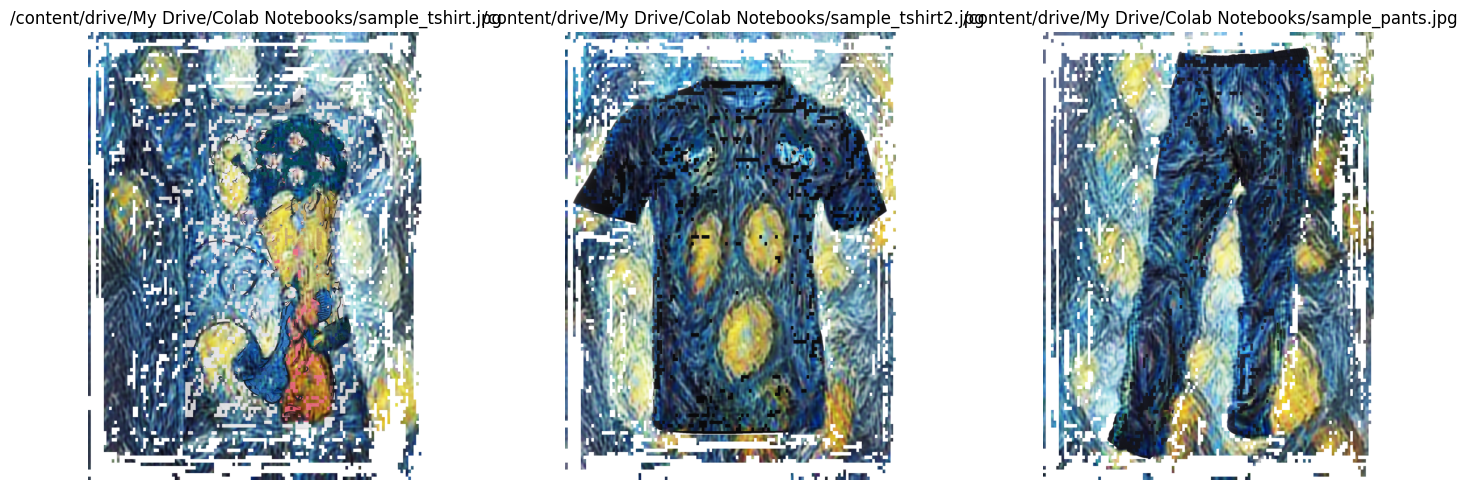

In [ ]:
# Define Content (T-shirt) Images
tshirt_images = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

# Apply Hybrid Stylization Model (UNet + NST)
styled_images = {}

style_image_path = "/content/drive/My Drive/Colab Notebooks/style_image2.jpg"

for img_path in tshirt_images:
    if not os.path.exists(img_path):
        print(f"Skipping {img_path}: File not found.")
        continue

    print(f"Processing {img_path}...")

    # Get original image and T-shirt mask
    original_image, tshirt_mask = get_tshirt_mask(img_path)

    # Apply NST to the T-shirt region
    styled_tshirt = apply_nst_to_tshirt(np.array(original_image), style_image_path)

    if styled_tshirt is None:
        print(f"Skipping {img_path}: NST failed.")
        continue

    # Ensure correct shape before blending
    print("Styled T-shirt Shape Before Blending:", styled_tshirt.shape)
    styled_tshirt = np.squeeze(styled_tshirt, axis=0)  # Remove batch dim

    # Blend stylized T-shirt back into the original image
    final_image = blend_tshirt(np.array(original_image), styled_tshirt, tshirt_mask)

    # Store the final stylized image
    styled_images[img_path] = final_image

if styled_images:
    plot_figures(styled_images, nrows=1, ncols=3, figsize=(15, 5))
else:
    print("No valid images to display.")


# **Model Performance Comparison**

In [ ]:
import time
import torch
import tensorflow as tf
import torchvision.models as models
import torchvision.transforms as T
from sklearn.metrics import jaccard_score
from skimage.metrics import structural_similarity as ssim
from segmentation_models_pytorch.losses import DiceLoss
from PIL import Image

In [ ]:
import time
import torch
import tensorflow as tf
import torchvision.models as models
import torchvision.transforms as T
from sklearn.metrics import jaccard_score
from skimage.metrics import structural_similarity as ssim
from segmentation_models_pytorch.losses import DiceLoss
from PIL import Image

In [ ]:
deeplab_model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained=True).eval()
deeplab_model.cpu()  # Move DeepLab model to CPU

unet_model = smp.Unet(encoder_name="mobilenet_v2", encoder_weights="imagenet", in_channels=3, classes=1).eval()
unet_model.cpu()  # Move UNet model to CPU

cnn_feature_extractor = models.mobilenet_v2(pretrained=True).features.eval()
cnn_feature_extractor.cpu()  # Move feature extractor to CPU


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weig

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [ ]:
deeplab_model = torch.hub.load("pytorch/vision:v0.10.0", "deeplabv3_resnet101", pretrained=True).eval()
unet_model = smp.Unet(encoder_name="mobilenet_v2", encoder_weights="imagenet", in_channels=3, classes=1).eval()
cnn_feature_extractor = models.mobilenet_v2(pretrained=True).features.eval()

# Define Image Transformation
transform = T.Compose([
    T.Resize((512, 512)),
    T.ToTensor()
])

# Load Image for Testing
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0)
    return image, input_tensor

# Load Ground Truth Mask (JPG Format)
def load_mask(mask_path):
    mask = Image.open(mask_path).convert("L")  # Convert to grayscale
    mask = mask.resize((512, 512))  # Ensure same size as input
    mask = np.array(mask)
    mask = (mask > 128).astype(np.uint8)  # Convert to binary (0 or 1)
    return mask

# Evaluate Segmentation Accuracy (IoU & Dice Score)
def evaluate_segmentation(model, image_tensor, ground_truth_mask):
    with torch.no_grad():
        output = model(image_tensor)['out'] if model == deeplab_model else model(image_tensor)

    # Modification: Handle multiclass output for DeepLabV3
    pred_mask = output.argmax(1).squeeze().cpu().numpy() if model == deeplab_model else (output.squeeze().cpu().numpy() > 0.5).astype(np.uint8)

    if model == deeplab_model:
        # Assuming ground_truth_mask is binary (0 or 1)
        # Convert pred_mask to binary based on the class of interest (e.g., T-shirt class)
        # Replace 'your_tshirt_class_index' with the actual class index of T-shirt in DeepLabV3's output
        pred_mask = (pred_mask == 15).astype(np.uint8)  # Example: Assuming T-shirt class index is 15

    # Compute IoU
    iou = jaccard_score(ground_truth_mask.flatten(), pred_mask.flatten(), average='binary')

    # Compute Dice Score
    dice_loss = DiceLoss(mode='binary')
    dice_score = 1 - dice_loss(torch.tensor(pred_mask).float(), torch.tensor(ground_truth_mask).float()).item()

    return iou, dice_score


def evaluate_style_transfer(original_image, stylized_image):
    """Evaluates style transfer quality using SSIM & Perceptual Loss."""

    # ✅ Remove batch dimension (if present)
    if len(stylized_image.shape) == 4:
        stylized_image = np.squeeze(stylized_image, axis=0)  # Shape: (H, W, 3)

    # ✅ Convert NumPy array to PIL format
    stylized_image_pil = Image.fromarray((stylized_image * 255).astype(np.uint8))

    # ✅ Ensure both images have the same size before SSIM
    original_image_resized = original_image.resize(stylized_image_pil.size)

    # ✅ Compute SSIM (Set win_size explicitly)
    ssim_score = ssim(
        np.array(original_image_resized),
        np.array(stylized_image_pil),
        multichannel=True,
        win_size=3  # 🔥 Explicitly set window size to avoid errors
    )

    # ✅ Compute VGG Perceptual Loss
    transform_vgg = T.Compose([
        T.Resize((224, 224)),
        T.ToTensor(),
        T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    original_tensor = transform_vgg(original_image_resized).unsqueeze(0)
    stylized_tensor = transform_vgg(stylized_image_pil).unsqueeze(0)

    with torch.no_grad():
        original_features = cnn_feature_extractor(original_tensor)
        stylized_features = cnn_feature_extractor(stylized_tensor)

    perceptual_loss = torch.nn.functional.mse_loss(original_features, stylized_features).item()

    return ssim_score, perceptual_loss


# Evaluate Computational Efficiency
def evaluate_efficiency(model, image_tensor):
    start_time = time.time()

    with torch.no_grad():
        # Move input tensor to CPU before passing to the model
        image_tensor = image_tensor.cpu()
        _ = model(image_tensor)['out'] if model == deeplab_model else model(image_tensor)

    inference_time = time.time() - start_time

    # CPU memory usage (rough estimate)
    memory_usage = torch.cuda.memory_allocated(0) / (1024 ** 2) if torch.cuda.is_available() else 0

    return inference_time, memory_usage

# Run Comparison for Selected Models
def compare_models(image_paths, mask_paths, style_image_path="/content/drive/My Drive/Colab Notebooks/style_image.jpg"): # Add a default style image path
    results = {}

    for image_path, mask_path in zip(image_paths, mask_paths):
        print(f"Processing {image_path}...")

        # Load Image & Ground Truth Mask
        original_image, input_tensor = load_image(image_path)
        ground_truth_mask = load_mask(mask_path)

        # Load and Preprocess Style Image
        style_image = Image.open(style_image_path).convert("RGB")
        style_image = style_image.resize((input_tensor.shape[3], input_tensor.shape[2])) # Resize to match content image
        style_tensor = T.ToTensor()(style_image).unsqueeze(0) # Convert to tensor
        # Move style_tensor to the same device as input_tensor
        style_tensor = style_tensor.to(input_tensor.device)

        # Convert PyTorch tensor to TensorFlow tensor
        content_image_tf = input_tensor.permute(0, 2, 3, 1).cpu().numpy() # Change the order of dimensions
        style_image_tf = style_tensor.permute(0, 2, 3, 1).cpu().numpy() # Change the order of dimensions
        content_image_tf = tf.convert_to_tensor(content_image_tf, dtype=tf.float32)
        style_image_tf = tf.convert_to_tensor(style_image_tf, dtype=tf.float32)

        # UNet-Based Segmentation
        unet_iou, unet_dice = evaluate_segmentation(unet_model, input_tensor, ground_truth_mask)
        # Pass content and style images to the hub_model
        stylized_unet = hub_model(content_image_tf, style_image_tf)[0].numpy() # Pass TensorFlow tensors
        unet_ssim, unet_perceptual_loss = evaluate_style_transfer(original_image, stylized_unet)
        unet_time, unet_memory = evaluate_efficiency(unet_model, input_tensor)

        results[f"UNet + NST ({image_path})"] = [unet_iou, unet_dice, unet_ssim, unet_perceptual_loss, unet_time, unet_memory]

        # DeepLabV3-Based Segmentation
        deeplab_iou, deeplab_dice = evaluate_segmentation(deeplab_model, input_tensor, ground_truth_mask)
        # Pass content and style images to the hub_model
        stylized_deeplab = hub_model(content_image_tf, style_image_tf)[0].numpy() # Pass TensorFlow tensors
        deeplab_ssim, deeplab_perceptual_loss = evaluate_style_transfer(original_image, stylized_deeplab)
        deeplab_time, deeplab_memory = evaluate_efficiency(deeplab_model, input_tensor)

        results[f"DeepLabV3 + NST ({image_path})"] = [deeplab_iou, deeplab_dice, deeplab_ssim, deeplab_perceptual_loss, deeplab_time, deeplab_memory]

    return results

# Define Paths for Selected Images & Ground Truth Masks
image_paths = [
    "/content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg",
    "/content/drive/My Drive/Colab Notebooks/sample_pants.jpg"
]

mask_paths = [
    "/content/drive/My Drive/Colab Notebooks/mask_tshirt2.png",
    "/content/drive/My Drive/Colab Notebooks/mask_pants.png"
]

# Run Comparison
results = compare_models(image_paths, mask_paths)
df_results = pd.DataFrame.from_dict(results, orient="index", columns=["IoU", "Dice Score", "SSIM", "Perceptual Loss", "Time (s)", "Memory (MB)"])
# df_results

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weig

Processing /content/drive/My Drive/Colab Notebooks/sample_tshirt2.jpg...
Processing /content/drive/My Drive/Colab Notebooks/sample_pants.jpg...


# **Self Trained Model**

In [ ]:
# import torchvision.models as models
# model = models.vgg19(pretrained=True)

In [ ]:
# import torch.nn as nn
# class VGG(nn.Module):
#     def __init__(self):
#         super(VGG,self).__init__()
#         self.req_features = ['0','5','10','19','28']
#         self.model = models.vgg19(pretrained=True).features[:29]
#     def forward(self,x):
#         features = []
#         for layer_num,layer in enumerate(self.model):
#             x = layer(x)
#             if(str(layer_num) in self.req_features):
#                 features.append(x)
#         return features

# def image_loader(path):
#     image = Image.open(path)
#     loader = transforms.Compose([transforms.Resize((512,512)), transforms.ToTensor()])
#     image = loader(image).unsqueeze(0)
#     return image.to(device,torch.float)

# # content function
# def calc_content_loss(gen_feat,orig_feat):
#     content_l = torch.mean((gen_feat - orig_feat)**2)
#     return content_l

# # style loss
# def calc_style_loss(gen,style):
#     batch_size,channel,height,width = gen.shape
#     G = torch.mm(gen.view(channel,height*width),gen.view(channel,height*width).t())
#     A = torch.mm(style.view(channel,height*width),style.view(channel,height*width).t())
#     style_l = torch.mean((G-A)**2)
#     return style_l

# # define loss function based on style and content loss
# def calculate_loss(gen_features,orig_features,style_features):
#     style_loss=content_loss=0
#     for gen,con,style in zip(gen_features,orig_features,style_features):
#         content_loss += calc_content_loss(gen,con)
#         style_loss += calc_style_loss(gen,style)
#     total_loss = alpha*content_loss + beta*style_loss
#     return total_loss

In [ ]:
# # access to drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !ls "/content/drive/My Drive/Colab Notebooks"

In [ ]:
# import torchvision.transforms as transforms
# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# original_image = image_loader(r"C:\Users\RY-LU\mlds432\sample_tshirt.jpg")
# style_image = image_loader( r"C:\Users\RY-LU\.cache\kagglehub\datasets\paramaggarwal\fashion-product-images-small\versions\1\images\style_image.jpg")
# generated_image = original_image.clone().requires_grad_(True)

In [ ]:
# from torchvision.utils import save_image

# model = VGG().to(device).eval()
# epoch = 150
# lr = 0.001
# alpha = 8
# beta = 70
# optimizer = optim.Adam([generated_image],lr=lr)
# for i in range(epoch):
#     gen_features = model(generated_image)
#     orig_features = model(original_image)
#     style_features = model(style_image)

#     total_loss = calculate_loss(gen_features,orig_features,style_features)
#     optimizer.zero_grad()
#     total_loss.backward()
#     optimizer.step()

#     if(not(i%100)):
#         print(total_loss)
#         save_image(generated_image,'gen.png')